# Moving average analyses of stock market time-series

Using some very basic technical trading ideas

In [66]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import datetime as dt
from datetime import date
from datetime import timedelta

In [7]:
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [67]:
# get Tesla stock price data from Yahoo
start = dt.datetime(2019,1,1)
end = date.today() - timedelta(days = 1)
df = pdr.get_data_yahoo('TSLA', start=start, end=end)

print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  20.406668  21.008667  19.920000  20.674667  20.674667  174879000
2019-01-03  20.466667  20.626667  19.825333  20.024000  20.024000  104478000
2019-01-04  20.400000  21.200001  20.181999  21.179333  21.179333  110911500
2019-01-07  21.448000  22.449333  21.183332  22.330667  22.330667  113268000
2019-01-08  22.797333  22.934000  21.801332  22.356667  22.356667  105127500


In [69]:
df['current_price'] = df.iat[-1,3]

In [68]:
# display
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

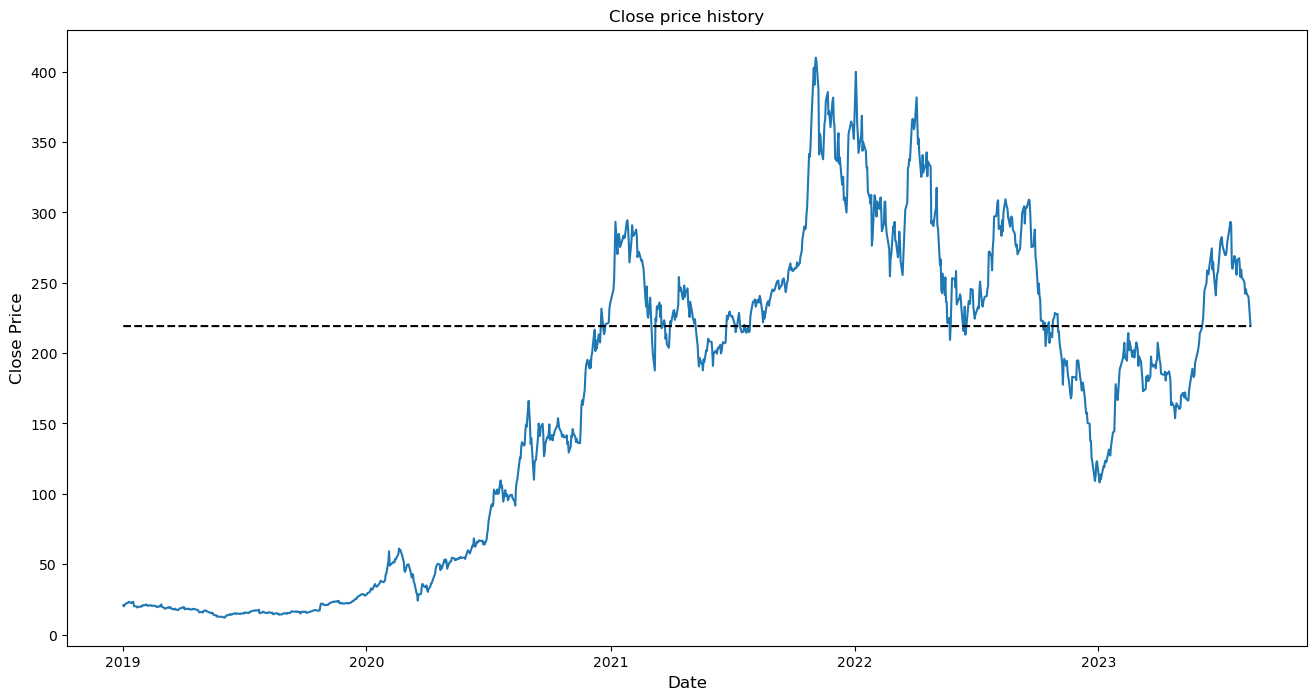

In [70]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.plot(df['current_price'], 'k--')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

In [71]:
df

,Open,High,Low,Close,Adj Close,Volume,current_price
Date,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,219.220001
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,219.220001
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,219.220001
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,219.220001
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,219.220001
...,...,...,...,...,...,...,...
2023-08-11,241.770004,243.789993,238.020004,242.649994,242.649994,98866600,219.220001
2023-08-14,235.699997,240.660004,233.750000,239.759995,239.759995,98595300,219.220001
2023-08-15,238.729996,240.500000,232.610001,232.960007,232.960007,88197600,219.220001


In [44]:
# support and resistance
supports = []
rounded_close = round(df['Close'],-1)
supports.append(rounded_close.mode()[0])

new_rounded_close = []
for i in range(len(rounded_close)):
    dlta = abs(rounded_close[i] - supports[-1])
    mn_dlta = np.mean(dlta)
    #print(dlta, mn_dlta)
    if dlta > 20:
        new_rounded_close.append(rounded_close[i])

new_rounded_close = pd.Series(new_rounded_close, dtype='float64')

In [37]:
new_rounded_close

0     210.0
1     220.0
2     220.0
3     230.0
4     230.0
5     230.0
6     230.0
7     210.0
8     220.0
9     210.0
10    150.0
11    150.0
12    140.0
13    140.0
14    130.0
dtype: float64

In [38]:




print(len(rounded_close))
print(len(new_rounded_close))

new_rounded_close.mode()[0]

43
15


230.0

In [53]:
# moving average
df['zero'] = 0
df['30ma'] = df['Close'].rolling(window=30,min_periods=0,center=True).mean()
df['10ma'] = df['Close'].rolling(window=10,min_periods=0,center=True).mean()
df['5ma'] = df['Close'].rolling(window=5,min_periods=0,center=True).mean()

#df.iat[0,6] = 0

#print(df.iloc[0,6])
#df.head()
#df['10ma'].shift(periods=1)
#df['5ma'].shift(periods=1)

df['Hull'] = (df['5ma']*2 - df['10ma'])
df['hError'] = df['Hull'] - df['Close']

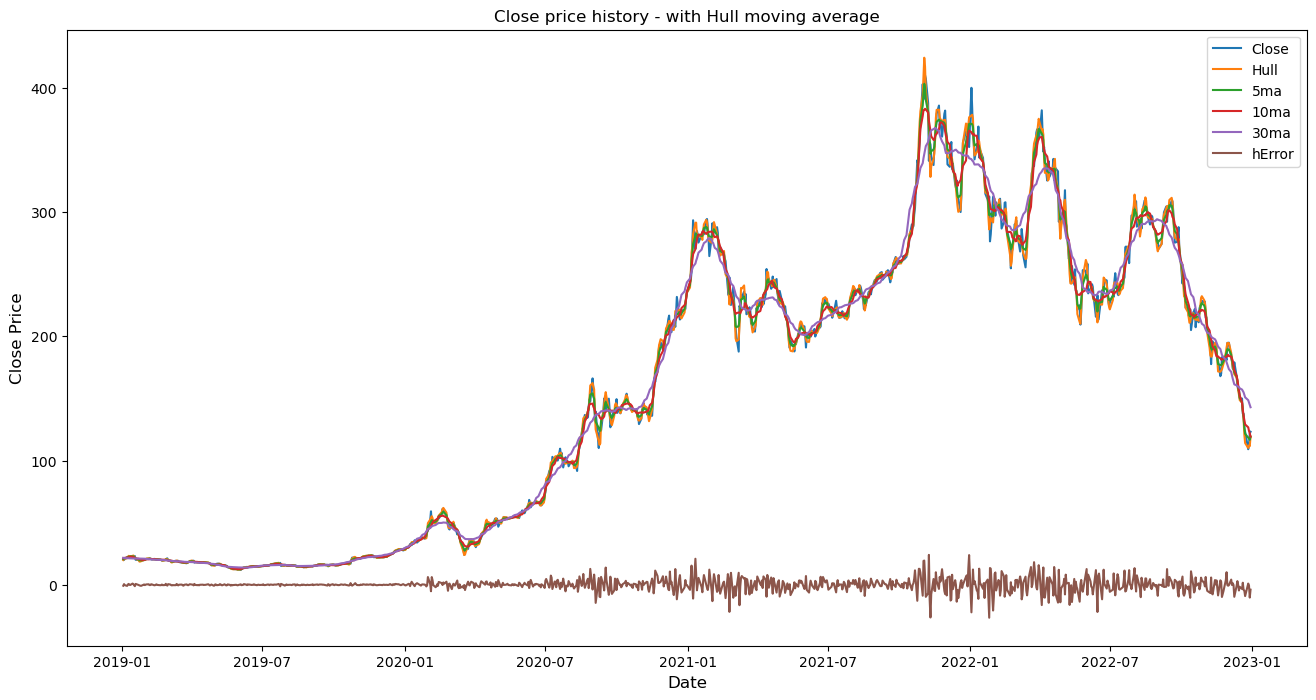

In [55]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('Close price history - with Hull moving average')
plt.plot(df['Close'], label='Close')
#plt.plot(df['rounded_close'])
#plt.plot(df['support'])
plt.plot(df['Hull'], label='Hull')
plt.plot(df['5ma'], label='5ma')
plt.plot(df['10ma'], label='10ma')
plt.plot(df['30ma'], label='30ma')
#plt.plot(df['zero'], label='zero')
plt.plot(df['hError'], label='hError')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend()
plt.show()

In [50]:
# create ohlc array for candlestick plot
ohlc = []
for i in range(len(df)):
    x = [i, df.iloc[i,0], df.iloc[i,1], df.iloc[i,2], df.iloc[i,3], df.iloc[i,4]]
    ohlc.append(x)

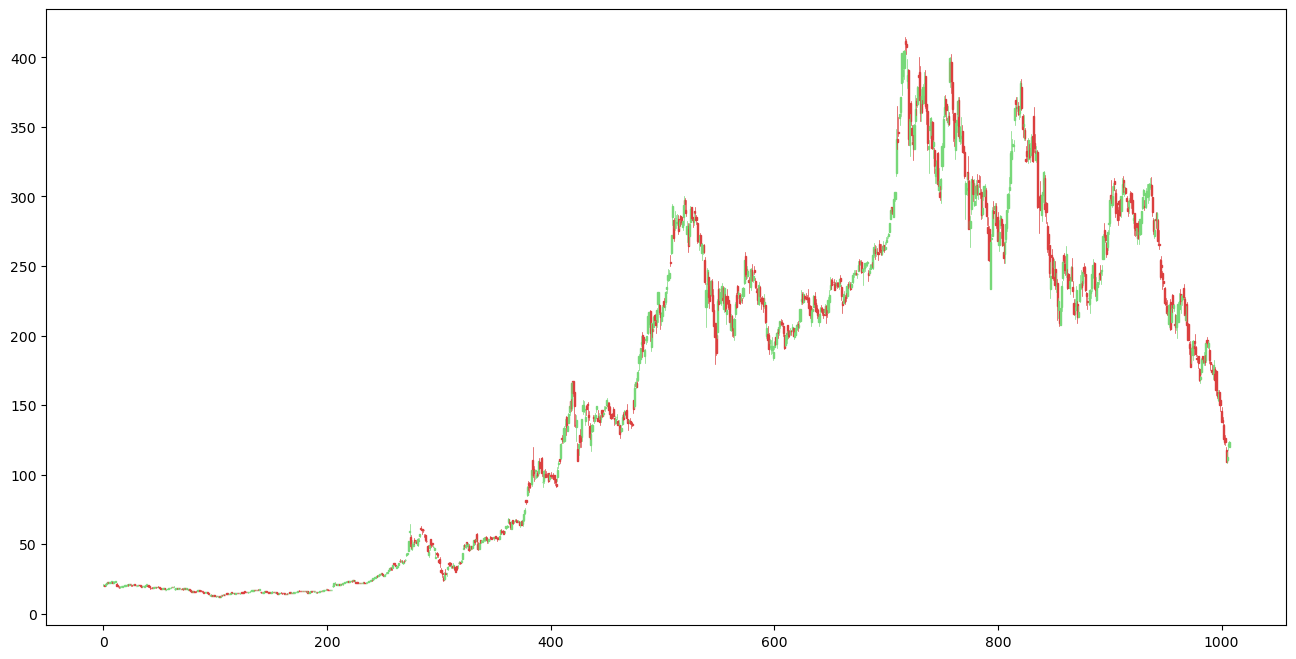

In [52]:
# display candlestick plot
import matplotlib.ticker as mticker
from mplfinance.original_flavor import candlestick_ohlc
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1, ohlc, width=1, colorup='#77d879', colordown='#db3f3f')
plt.show()

In [43]:
df['Trade_direction'] = 'Bull'

for i in range(len(df)):
    if df.iat[i,0] > df.iat[i,3]:
        df.iat[i,12] = 'Bear'

df

,Open,High,Low,Close,Adj Close,Volume,zero,30ma,10ma,5ma,Hull,hError,Trade_direction
Date,,,,,,,,,,,,,
2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800,0,210.513333,222.384000,219.436666,216.489332,5.239332,Bull
2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900,0,209.290625,223.243332,220.849998,218.456665,-3.963333,Bull
2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500,0,208.415882,223.897143,222.384000,220.870857,-3.769143,Bull
2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,0,207.221666,222.782499,225.641998,228.501497,3.411501,Bear
2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,0,205.955789,221.952221,226.722000,231.491779,2.971775,Bull
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,0,204.667500,220.503999,224.789999,229.075999,1.536006,Bull
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,0,202.915237,219.087000,222.834000,226.581000,-1.239008,Bear
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,0,201.415000,215.975000,218.623999,221.272998,6.293002,Bear
2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800,0,200.623043,211.270000,212.532001,213.794002,-1.515996,Bull
